In [3]:
import pandas as pd
import nflfastpy as nfl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [5]:
df = nfl.load_pbp_data(2021)

In [11]:
df_early = df.loc[(df['down']==1)|(df['down']==2)]

In [18]:
df_early.loc['play'] = 1

/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
df_pass = df_early[['posteam', 'down', 'pass', 'play']]

In [21]:
df = df_pass.groupby(['posteam'], as_index=False).agg({'pass': ['sum'],'play':['sum']})

In [22]:
df['rate'] = df['pass']/df['play']

In [24]:
df2 = nfl.load_pbp_data(2021)
df2 = df2.groupby('posteam')[['epa']].mean().sort_values(by='epa', ascending=False)

In [25]:
df3 = df2.merge(df[['posteam','pass','play', 'rate']], on='posteam')

/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:9190: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(
/Users/moore_austin02/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [29]:
df3.columns = ['posteam','epa', 'rushes', 'plays', 'pass_rate']

In [31]:
logos = pd.read_csv('Teams.csv')
logos = pd.read_csv('Teams.csv')
df3 = df3.merge(logos[['team_logo_espn', 'team_abbr']].rename(columns={'team_abbr': 'posteam'}), on='posteam')

/var/folders/0p/1_l8qlts6zlf1414_kt1f9lm0000gn/T/ipykernel_70217/842795477.py:5: MatplotlibDeprecationWarning: Directly reading images from URLs is deprecated since 3.4 and will no longer be supported two minor releases later. Please open the URL for reading and pass the result to Pillow, e.g. with ``PIL.Image.open(urllib.request.urlopen(url))``.
  return OffsetImage(plt.imread(path), zoom=zoom)


Text(0.78, 0.06, 'Data from nflfastR @AustinAnalytics')

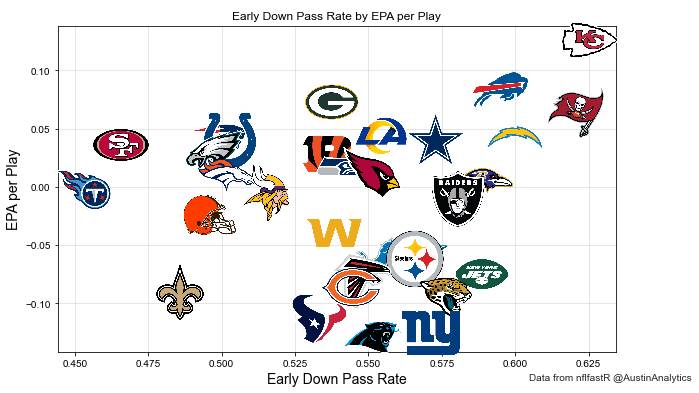

In [32]:
x = df3.pass_rate
y = df3.epa

def getImage(path, zoom=.12):
    return OffsetImage(plt.imread(path), zoom=zoom)

paths = df3['team_logo_espn']

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(x, y,s=.001) 
plt.style.use('seaborn-dark')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

for x0, y0, path in zip(x, y,paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

#Add a grid
ax.grid(zorder=0,alpha=.4)
ax.set_axisbelow(True)
    
#Adding labels and text\
ax.set_title('Early Down Pass Rate by EPA per Play')
ax.set_xlabel('Early Down Pass Rate', fontsize=14)
ax.set_ylabel('EPA per Play', fontsize=14)
plt.figtext(.78, .06, 'Data from nflfastR @AustinAnalytics', fontsize=10)
#plt.savefig('Early Down Run Rate by EPA per Play5.png')